In [1]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the file
data=pd.read_csv('../data/Dataset_ecommerce.csv')

In [3]:
#call 5 data to view the file
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [4]:
#stats of the data
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#check for missing data
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [7]:
#drop row with missing data
data.dropna(inplace=True)

In [8]:
#check again for mising data
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [9]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [10]:
from datetime import datetime as dt

def get_month(x):
    return dt(x.year, x.month, 1)


data['InvoiceDate']= data['InvoiceDate'].apply(get_month)

data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
#create a new column
data['Total_price']=data['Quantity'] * data['UnitPrice']

In [13]:
#check if total_price has been added to the dataframe
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Total_price
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


# ANALYSIS SHOWING DIFFERNT COUNTRY WITH TOTAL AMOUNT OF GOODS BOUGHT

In [14]:
price = data.groupby(['Country'])['Total_price'].sum().reset_index()
price= price.sort_values(['Total_price'], ascending=False)

In [15]:
#top 10 countries with highest amount bought
top10=price.head(10)
top10

,Country,Total_price
9,Libya,37690362.35
19,Somalia,37663830.57
23,Togo,37592496.96
11,Mali,37508467.02
7,Ghana,37414593.40
15,Nigeria,37364243.60
6,Ethiopia,37228695.13
13,Mozambique,37145464.36
18,Sierra Leone,37140824.43
0,Algeria,37140683.52


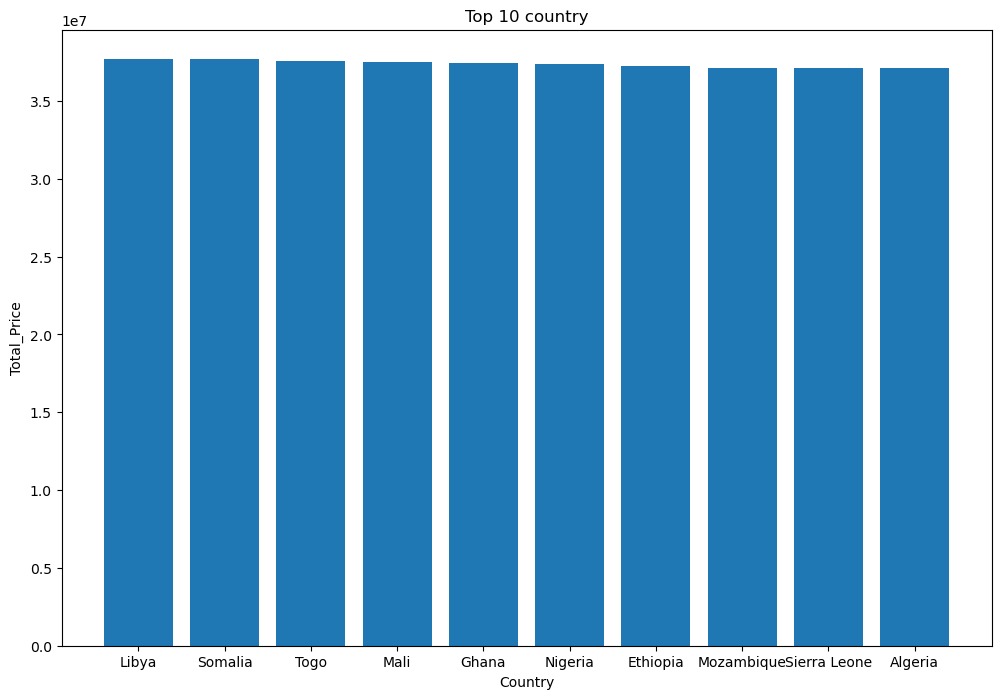

In [16]:
plt.figure(figsize=(12,8))
plt.bar(data=top10, x='Country', height='Total_price')
plt.title('Top 10 country')
plt.xlabel('Country')
plt.ylabel('Total_Price')
plt.show()

In [17]:
#Last 10 countries with lowest amount bought
last10=price.tail(10)
last10

,Country,Total_price
1,Benin,36921841.33
16,Rwanda,36864615.30
24,Tunisia,36837574.80
22,Tanzania,36820360.73
14,Niger,36808276.74
2,Burkina Faso,36671763.77
5,Egypt,36619734.48
25,Uganda,36598727.25
10,Madagascar,36524344.59
26,Zambia,36253058.16


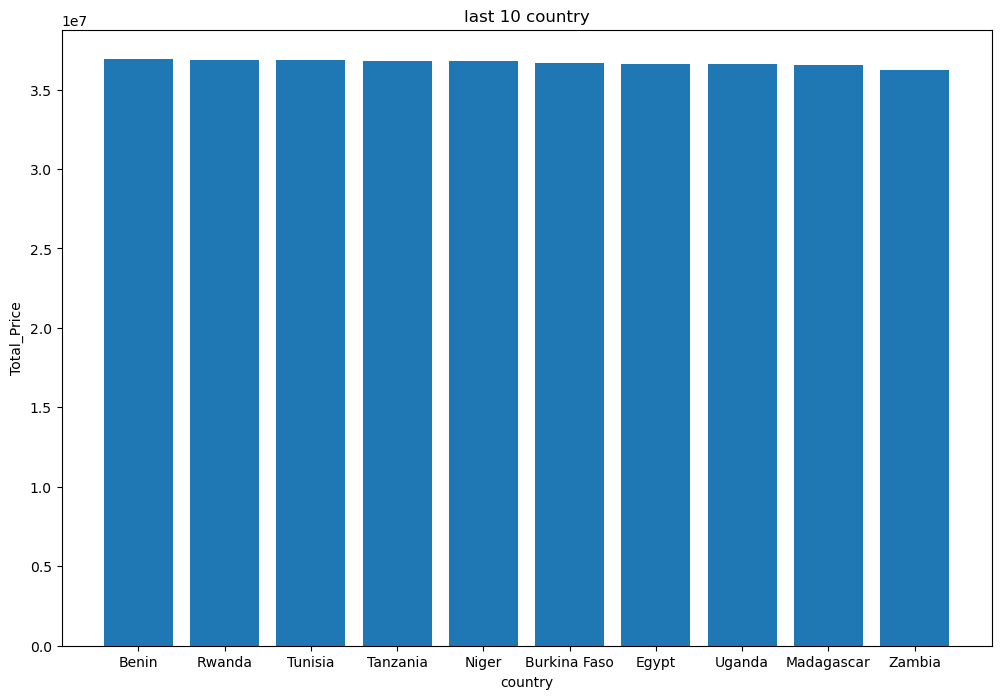

In [18]:
plt.figure(figsize=(12,8))
plt.bar(data=last10, x='Country', height='Total_price')
plt.title('last 10 country')
plt.xlabel('country')
plt.ylabel('Total_Price')
plt.show()

# COUNTRY WITH RESPECT TO NUMBER OF CUSTOMER FROM THEM

In [19]:
customer = data.groupby(['Country'])['CustomerID'].nunique().reset_index()
customer= customer.sort_values(['CustomerID'], ascending=False)

In [20]:
#top 10 countries with highest NUMBER of customer
customer = customer.rename(columns={'CustomerID': 'No of Customers'})
customer.head(10)


,Country,No of Customers
13,Mozambique,3072
1,Benin,3054
23,Togo,3053
15,Nigeria,3051
2,Burkina Faso,3049
18,Sierra Leone,3046
11,Mali,3044
0,Algeria,3043
17,Senegal,3040
14,Niger,3039


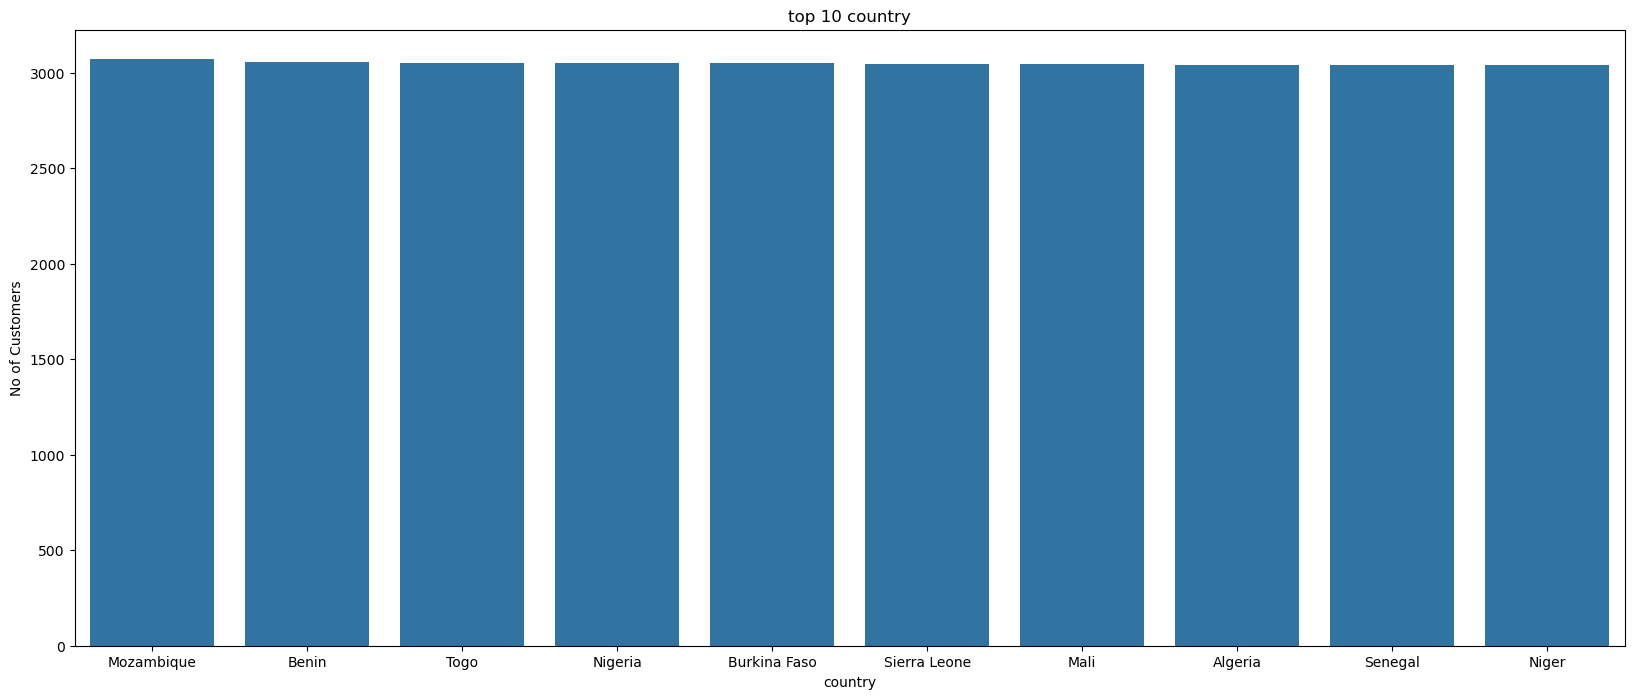

In [21]:
#top 10 countries with highest NUMBER of customer
Ctop10=customer.head(10)
plt.figure(figsize=(20,8))
sns.barplot( x = 'Country', y = 'No of Customers', data=Ctop10)
plt.title('top 10 country')
plt.xlabel('country')
plt.ylabel('No of Customers')
plt.show()

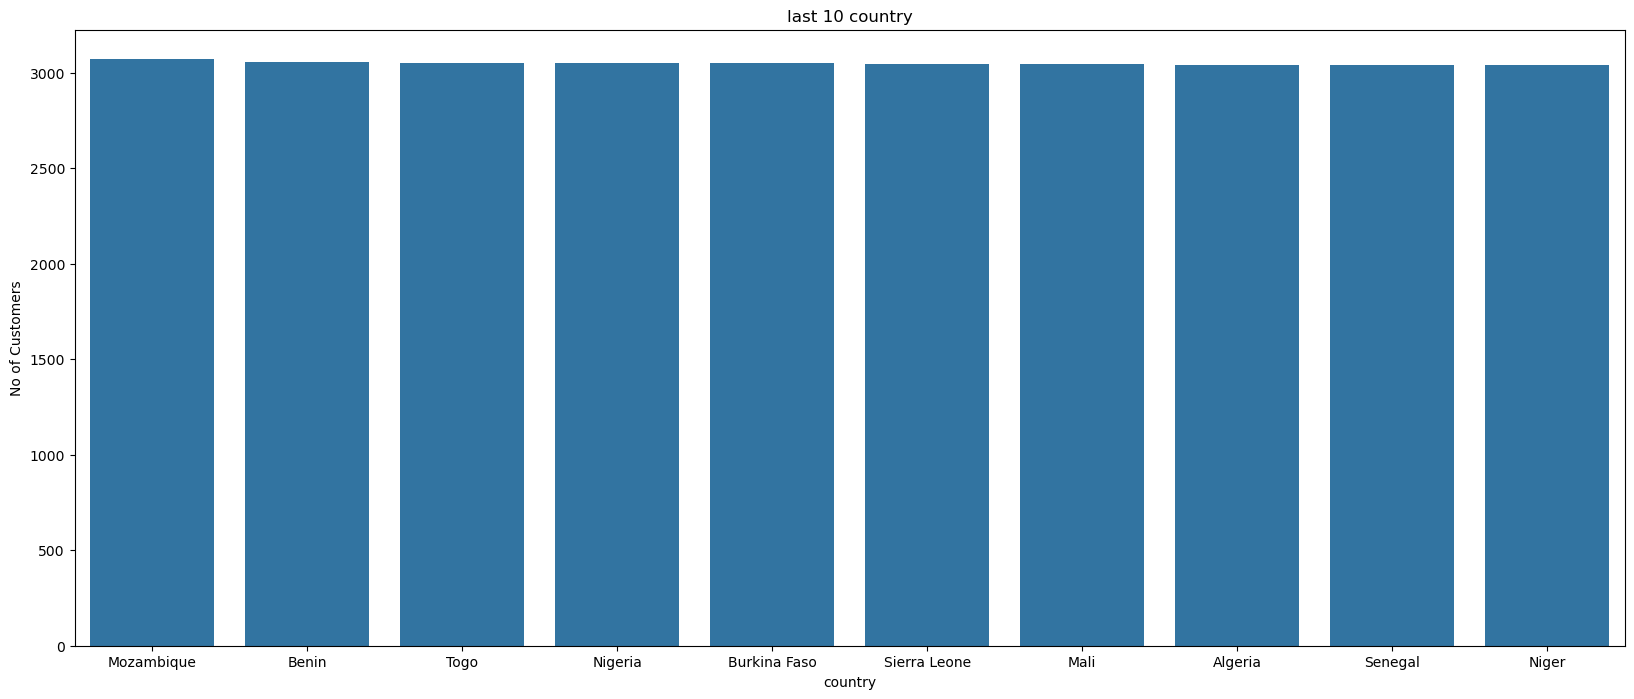

In [22]:
#last countries with lowest NUMBER of customer
Clast10=customer.tail(10)
plt.figure(figsize=(20,8))
sns.barplot( x = 'Country', y = 'No of Customers', data=Ctop10)
plt.title('last 10 country')
plt.xlabel('country')
plt.ylabel('No of Customers')
plt.show()

# DIFFERNT GOODS BOUGHT IN RESPECT TO COUNTRY

In [23]:
country_des = data.pivot_table(index='Country',
                                 columns='Description',
                                 aggfunc='size',
                                 fill_value=0)

country_des.head(5)

Description,Books,Cloths,Cosmetics,Electronics,Furniture,Jewelry,Kitchenware,Shoes,Sports Equipment,Toys
Country,,,,,,,,,,
Algeria,1422,1468,1452,1432,1401,1464,1410,1512,1482,1449
Benin,1456,1476,1423,1459,1423,1502,1516,1409,1503,1443
Burkina Faso,1428,1412,1448,1470,1465,1408,1512,1451,1408,1411
Cameroon,1452,1442,1529,1378,1483,1488,1432,1464,1459,1492
Cote d'Ivoire,1468,1509,1483,1456,1482,1459,1401,1419,1492,1476


In [24]:
most_desc= data['Description'].value_counts()

In [25]:
most_desc.head()

Description
Jewelry             41017
Sports Equipment    40983
Toys                40829
Furniture           40770
Shoes               40769
Name: count, dtype: int64

# Customers Frequency [ How often a customer makes purchases over a specific period ]

In [26]:
#calculate the customers frequency
most_freqent_customer = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Renaming the 'count' column to 'frequency'
most_freqent_customer = most_freqent_customer.rename(columns={'InvoiceNo': 'Frequency'})

most_freqent_customer = most_freqent_customer.sort_values(['Frequency'], ascending=False)
most_freqent_customer

,CustomerID,Frequency
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1


In [27]:
# top 10 
frequency_15 = most_freqent_customer.head(15)
frequency_15

,CustomerID,Frequency
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
2192,15311.0,118
487,12971.0,89
1615,14527.0,86
803,13408.0,81
1703,14646.0,77


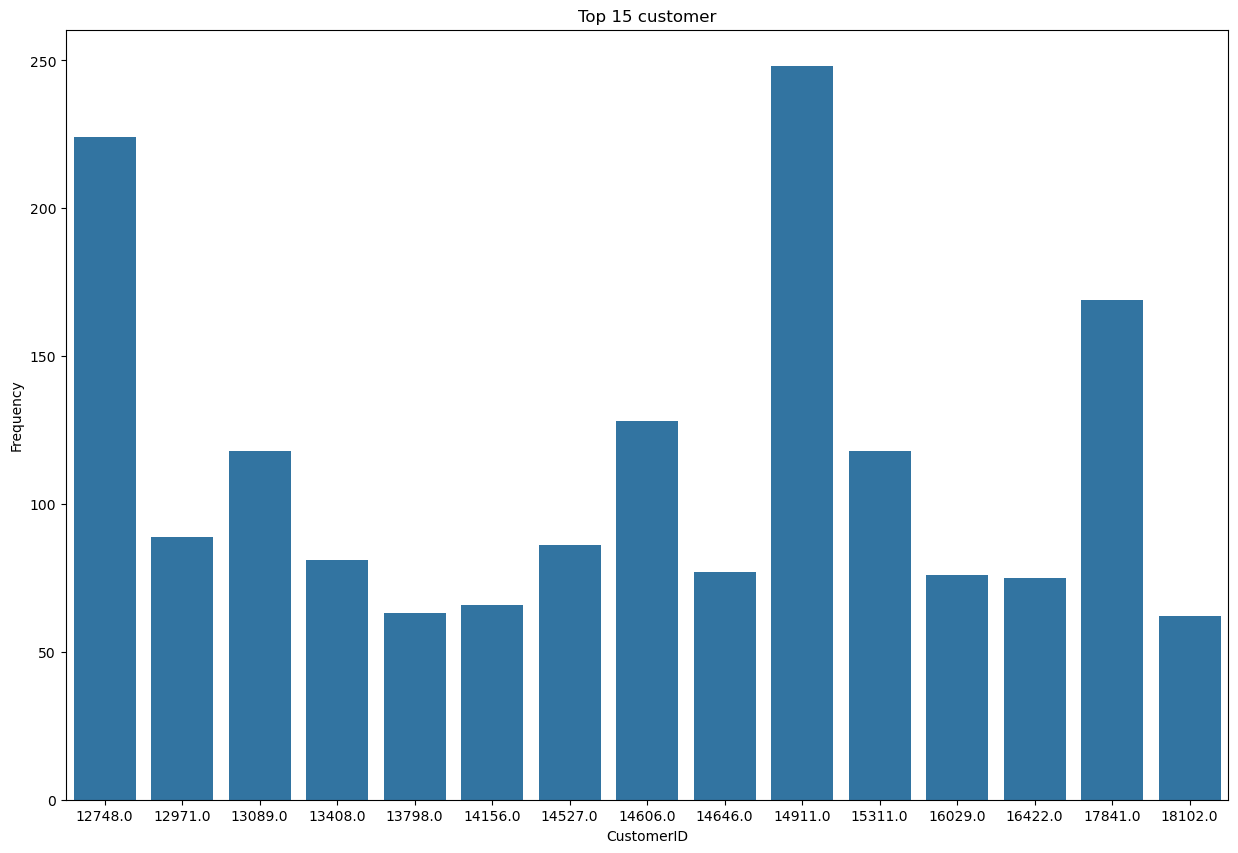

In [28]:
# top 10 loyal
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Frequency', data=frequency_15 )
plt.title('Top 15 customer')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.show()

In [29]:
# last 10
last_10 = most_freqent_customer.tail(10)
last_10

,CustomerID,Frequency
3007,16412.0,1
1138,13874.0,1
1140,13876.0,1
3003,16406.0,1
3001,16404.0,1
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1
990,13670.0,1


# Customer Monetary [ The total amount of money a customer has spent ]

In [30]:
spending_customer = data.groupby(['CustomerID'])['Total_price'].sum().reset_index()
spending_customer = spending_customer.sort_values(['Total_price'], ascending=False)
spending_customer= spending_customer.rename(columns={'Total_price': 'Total money spent'})
spending_customer

,CustomerID,Total money spent
4042,17841.0,20383830.65
1895,14911.0,15362741.47
1300,14096.0,12965429.74
330,12748.0,11912482.34
1674,14606.0,7144512.92
...,...,...
777,13366.0,99.12
3677,17347.0,66.30
3351,16881.0,60.32
2525,15753.0,30.82


In [31]:
top10spending_customer=spending_customer.head(10)
top10spending_customer

,CustomerID,Total money spent
4042,17841.0,20383830.65
1895,14911.0,15362741.47
1300,14096.0,12965429.74
330,12748.0,11912482.34
1674,14606.0,7144512.92
2192,15311.0,6301150.63
1703,14646.0,5418075.66
568,13089.0,4739395.74
698,13263.0,4233075.52
1447,14298.0,4123714.52


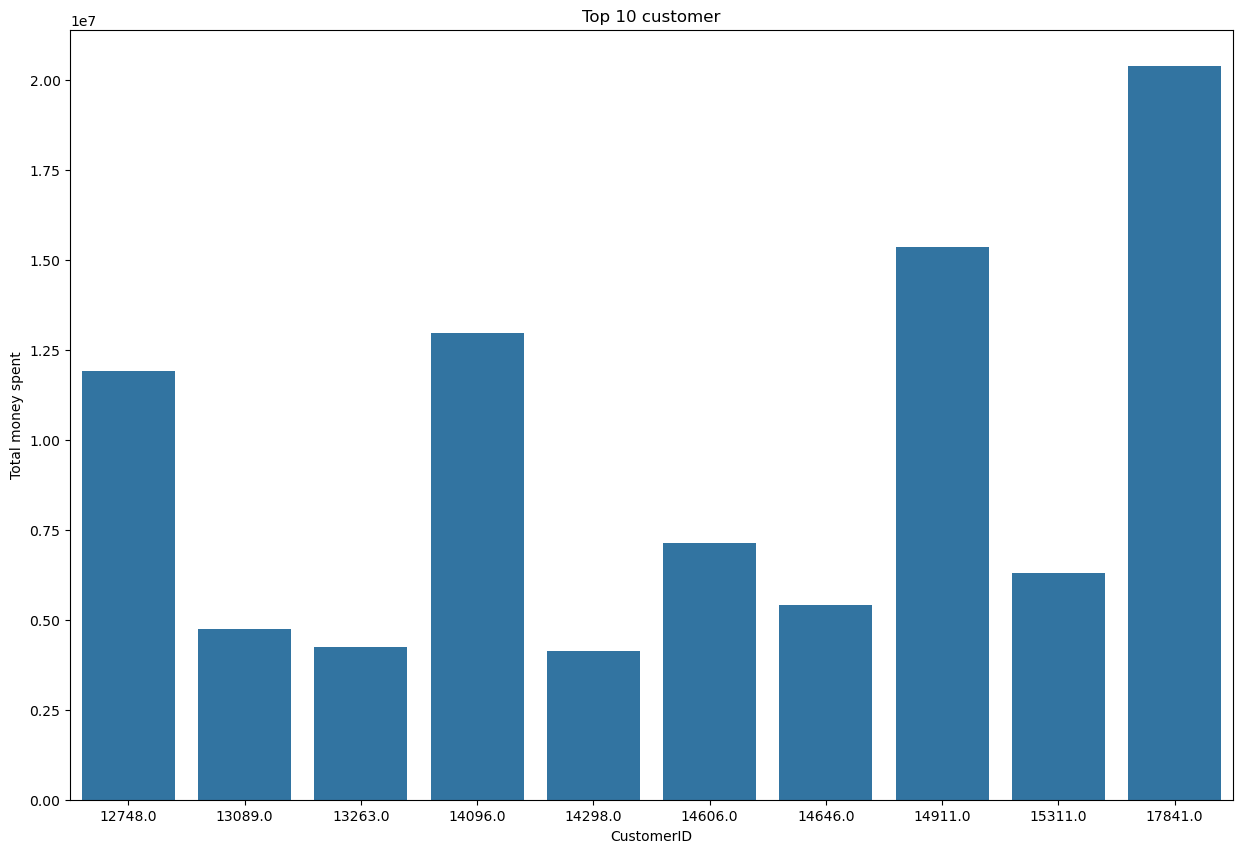

In [32]:
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Total money spent', data=top10spending_customer )
plt.title('Top 10 customer')
plt.xlabel('CustomerID')
plt.ylabel('Total money spent')
plt.show()

In [33]:
last10spending_customer=spending_customer.tail(10)
last10spending_customer

,CustomerID,Total money spent
727,13302.0,274.93
3242,16737.0,214.89
3991,17763.0,200.42
1010,13703.0,112.95
1536,14424.0,99.18
777,13366.0,99.12
3677,17347.0,66.30
3351,16881.0,60.32
2525,15753.0,30.82
2350,15524.0,17.36


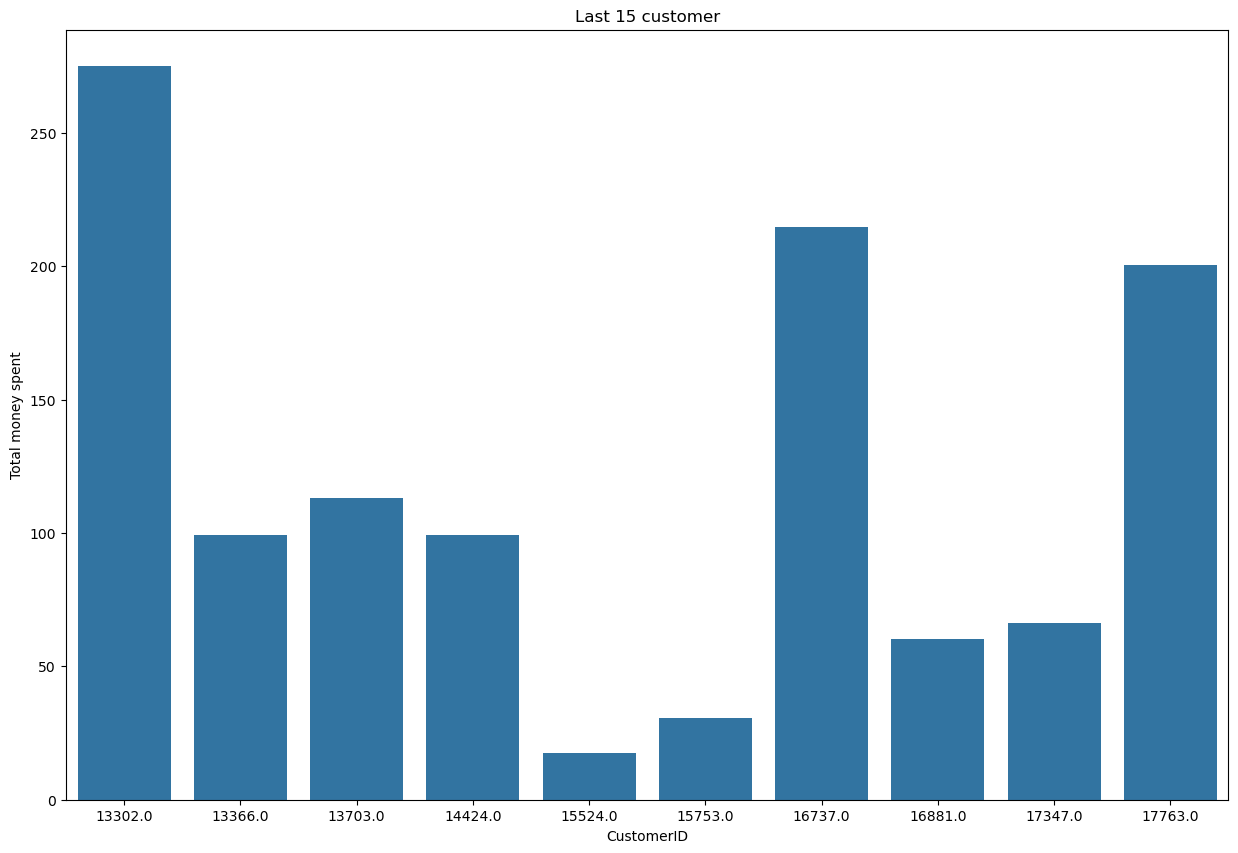

In [34]:
plt.figure(figsize=(15,10))
sns.barplot( x ='CustomerID', y= 'Total money spent', data=last10spending_customer )
plt.title('Last 15 customer')
plt.xlabel('CustomerID')
plt.ylabel('Total money spent')
plt.show()

# Customer Recency / Customer Tenure [ Amount of time that has passed since a customer's last purchase ]

In [35]:
recent_date = data['InvoiceDate'].max()
recent_date

Timestamp('2011-12-01 00:00:00')

In [36]:
recency_time = data.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
recency_time

,CustomerID,InvoiceDate
0,12346.0,2011-01-01
1,12347.0,2011-12-01
2,12348.0,2011-09-01
3,12349.0,2011-11-01
4,12350.0,2011-02-01
...,...,...
4367,18280.0,2011-03-01
4368,18281.0,2011-06-01
4369,18282.0,2011-12-01
4370,18283.0,2011-12-01


In [37]:
recency_time['Recency'] = (recent_date - recency_time['InvoiceDate']).dt.days
recency_time = recency_time.sort_values(['Recency'], ascending=False)
recency_time

,CustomerID,InvoiceDate,Recency
3227,16718.0,2010-12-01,365
704,13270.0,2010-12-01,365
4246,18119.0,2010-12-01,365
1046,13747.0,2010-12-01,365
3254,16752.0,2010-12-01,365
...,...,...,...
1712,14658.0,2011-12-01,0
1713,14659.0,2011-12-01,0
498,12989.0,2011-12-01,0
3835,17554.0,2011-12-01,0


In [38]:
updatedrecency_time = recency_time[['CustomerID','Recency']].reset_index(drop=True)
updatedrecency_time

,CustomerID,Recency
0,16718.0,365
1,13270.0,365
2,18119.0,365
3,13747.0,365
4,16752.0,365
...,...,...
4367,14658.0,0
4368,14659.0,0
4369,12989.0,0
4370,17554.0,0


In [44]:
Rtop10 = updatedrecency_time.head(10)
Rtop10

,CustomerID,Recency
0,16718.0,365
1,13270.0,365
2,18119.0,365
3,13747.0,365
4,16752.0,365
5,16754.0,365
6,18113.0,365
7,16781.0,365
8,16795.0,365
9,16812.0,365


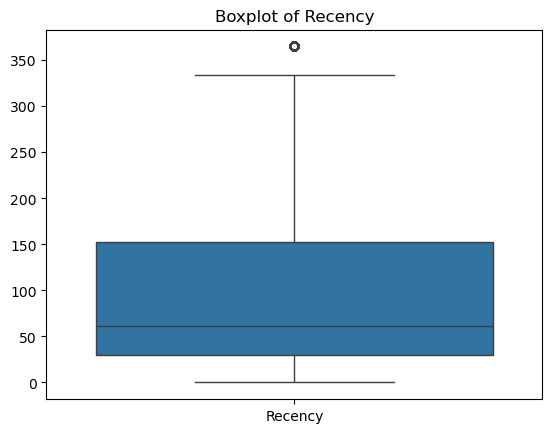

In [46]:
sns.boxplot(data=updatedrecency_time[['Recency']])
plt.title('Boxplot of Recency')
plt.show()

In [47]:
updatedrecency_time['Recency'].quantile(0.25)

30.0

In [48]:
updatedrecency_time['Recency'].quantile(0.50)

61.0

In [49]:
updatedrecency_time['Recency'].quantile(0.75)

153.0

In [55]:
updatedrecency_time['Recency'].max()
print( "Highest Recency:", updatedrecency_time['Recency'].max() ) 

Highest Recency: 365


In [56]:
updatedrecency_time['Recency'].min()
print( "Lowest Recency:", updatedrecency_time['Recency'].min() )

Lowest Recency: 0
